<a href="https://colab.research.google.com/github/Pickase/Euro-US-CurrencyForecast-/blob/main/Euro-US.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About Data

- Reference rates are euro foreign exchange rates observed on major foreign exchange trading venues at a certain point in time = they are the price of one currency in terms of another currency. The rates are usually updated around 16:00 CET on every working day, except on TARGET closing days.

- Dataset contains date and Euro rate corresponding to Australian dollar,
Bulgarian lev, Brazilian real, Canadian dollar, Swiss franc, Chinese yuan
renminbi, Cypriot pound, Czech koruna, Danish krone, Estonian kroon, UK pound sterling, Greek drachma, Hong Kong dollar, Croatian kuna, Hungarian forint, Indonesian rupiah, Israeli shekel, Indian rupee, Iceland krona, Japanese yen, Korean won, Lithuanian litas, Latvian lats, Maltese lira, Mexican peso, Malaysian ringgit, Norwegian krone, New Zealand dollar, Philippine peso, Polish zloty, Romanian leu, Russian rouble, Swedish krona, Singapore dollar, Slovenian tolar, Slovak koruna, Thai baht, Turkish lira, US dollar, South African rand.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from numpy import log
from pmdarima import auto_arima
from statsmodels.graphics.tsaplots import plot_predict
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [ ]:
er=pd.read_csv('EuroCR.csv')
er.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],[Estonian kroon ],[UK pound sterling ],[Greek drachma ],[Hong Kong dollar ],[Croatian kuna ],[Hungarian forint ],[Indonesian rupiah ],[Israeli shekel ],[Indian rupee ],[Iceland krona ],[Japanese yen ],[Korean won ],[Lithuanian litas ],[Latvian lats ],[Maltese lira ],[Mexican peso ],[Malaysian ringgit ],[Norwegian krone ],[New Zealand dollar ],[Philippine peso ],[Polish zloty ],[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2023-01-27,1.5289,1.9558,5.5104,1.4479,1.0017,7.3690,NaN,23.826,7.4378,NaN,0.87885,NaN,8.5061,NaN,388.85,16281.15,3.7353,88.6720,154.9,141.10,1341.37,NaN,NaN,NaN,20.3678,4.6116,10.7600,1.6759,59.187,4.7085,4.8965,NaN,11.2108,1.4277,NaN,NaN,35.7020,20.4365,1.0865,18.7185
1,2023-01-26,1.5308,1.9558,5.5572,1.4568,1.0002,7.3893,NaN,23.818,7.4383,NaN,0.87945,NaN,8.5295,NaN,387.38,16298.97,3.7091,88.8255,156.5,141.38,1342.51,NaN,NaN,NaN,20.5275,4.6255,10.7620,1.6799,59.301,4.7195,4.8818,NaN,11.1763,1.4292,NaN,NaN,35.6870,20.4961,1.0895,18.6127
2,2023-01-25,1.5360,1.9558,5.5690,1.4544,1.0020,7.3778,NaN,23.808,7.4381,NaN,0.88248,NaN,8.5202,NaN,388.75,16278.93,3.6651,88.7258,157.1,141.17,1343.93,NaN,NaN,NaN,20.4360,4.6357,10.7896,1.6792,59.350,4.7158,4.9035,NaN,11.1335,1.4307,NaN,NaN,35.7180,20.4658,1.0878,18.6745
3,2023-01-24,1.5470,1.9558,5.6164,1.4517,1.0053,7.3642,NaN,23.874,7.4399,NaN,0.88368,NaN,8.5014,NaN,397.33,16259.05,3.6671,88.6235,156.1,141.47,1341.60,NaN,NaN,NaN,20.4603,4.6448,10.7193,1.6743,59.122,4.7130,4.9171,NaN,11.0995,1.4337,NaN,NaN,35.6090,20.4234,1.0858,18.7687
4,2023-01-23,1.5529,1.9558,5.6372,1.4523,1.0013,7.3730,NaN,23.881,7.4393,NaN,0.87970,NaN,8.5105,NaN,395.98,16314.27,3.6709,88.4520,154.7,141.65,1335.67,NaN,NaN,NaN,20.4428,4.6588,10.6835,1.6778,59.345,4.7113,4.9202,NaN,11.1183,1.4328,NaN,NaN,35.6300,20.4478,1.0871,18.6597


In [ ]:
er.keys()

Index(['Period\Unit:', '[Australian dollar ]', '[Bulgarian lev ]',
       '[Brazilian real ]', '[Canadian dollar ]', '[Swiss franc ]',
       '[Chinese yuan renminbi ]', '[Cypriot pound ]', '[Czech koruna ]',
       '[Danish krone ]', '[Estonian kroon ]', '[UK pound sterling ]',
       '[Greek drachma ]', '[Hong Kong dollar ]', '[Croatian kuna ]',
       '[Hungarian forint ]', '[Indonesian rupiah ]', '[Israeli shekel ]',
       '[Indian rupee ]', '[Iceland krona ]', '[Japanese yen ]',
       '[Korean won ]', '[Lithuanian litas ]', '[Latvian lats ]',
       '[Maltese lira ]', '[Mexican peso ]', '[Malaysian ringgit ]',
       '[Norwegian krone ]', '[New Zealand dollar ]', '[Philippine peso ]',
       '[Polish zloty ]', '[Romanian leu ]', '[Russian rouble ]',
       '[Swedish krona ]', '[Singapore dollar ]', '[Slovenian tolar ]',
       '[Slovak koruna ]', '[Thai baht ]', '[Turkish lira ]', '[US dollar ]',
       '[South African rand ]'],
      dtype='object')

In [ ]:
er.columns=['Date', 'Australian[dollar]', 'Bulgarian[lev]','Brazilian[real]', 'Canadian[dollar]', 'Swiss[franc]','Chinese[yuan renminbi]', 'Cypriot[pound]', 'Czech[koruna]','Danish[krone]', 'Estonian[kroon]', 'UK[pound sterling]','Greek[drachma]', 'Hong Kong[dollar]', 'Croatian[kuna]','Hungarian[forint]', 'Indonesian[rupiah]', 'Israeli[shekel]','Indian[rupee]', 'Iceland[krona]', 'Japanese[yen]','Korean[won]', 'Lithuanian[litas]', 'Latvian[lats]','Maltese[lira]', 'Mexican[peso]', 'Malaysian[ringgit]','Norwegian[krone]', 'New Zealand[dollar]', 'Philippine[peso]','Polish[zloty]', 'Romanian[leu]', 'Russian[rouble]','Swedish[krona]', 'Singapore[dollar]', 'Slovenian[tolar]','Slovak[koruna]', 'Thai[baht]', 'Turkish[lira]', 'US[dollar]','South African[rand]']

In [ ]:
er.shape

(6229, 41)

In [ ]:
er.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6229 entries, 0 to 6228
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    6229 non-null   object 
 1   Australian[dollar]      6229 non-null   object 
 2   Bulgarian[lev]          5827 non-null   object 
 3   Brazilian[real]         5961 non-null   object 
 4   Canadian[dollar]        6229 non-null   object 
 5   Swiss[franc]            6229 non-null   object 
 6   Chinese[yuan renminbi]  5961 non-null   object 
 7   Cypriot[pound]          2346 non-null   object 
 8   Czech[koruna]           6229 non-null   object 
 9   Danish[krone]           6229 non-null   object 
 10  Estonian[kroon]         3130 non-null   object 
 11  UK[pound sterling]      6229 non-null   object 
 12  Greek[drachma]          520 non-null    object 
 13  Hong Kong[dollar]       6229 non-null   object 
 14  Croatian[kuna]          5941 non-null   

In [ ]:
er['Day']=pd.to_datetime(er.Date).dt.day
er['Month']=pd.to_datetime(er.Date).dt.month
er['Year']=pd.to_datetime(er.Date).dt.year
er['Date']=pd.to_datetime(er.Date)
er['Date']=pd.to_datetime(er.Date,format='%Y%m%d')

In [ ]:
eru=er[['Date','US[dollar]']]#since we are taking US dataset for time series forecasting

In [ ]:
er=er.set_index("Date")
eru=eru[eru['US[dollar]']!='-']
eru.dropna(how='any', inplace=True)
eru['US[dollar]'] = eru['US[dollar]'].map(lambda x: float(x))
eru.head()

,Date,US[dollar]
0,2023-01-27,1.0865
1,2023-01-26,1.0895
2,2023-01-25,1.0878
3,2023-01-24,1.0858
4,2023-01-23,1.0871


In [ ]:
eru.dropna(how='any', inplace=True)

In [ ]:
eru = eru.set_index("Date")
eru=eru["US[dollar]"].resample("M").mean()

In [ ]:
eri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6229 entries, 0 to 6228
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           6229 non-null   datetime64[ns]
 1   Indian[rupee]  5961 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 97.5+ KB


<AxesSubplot:xlabel='Date'>

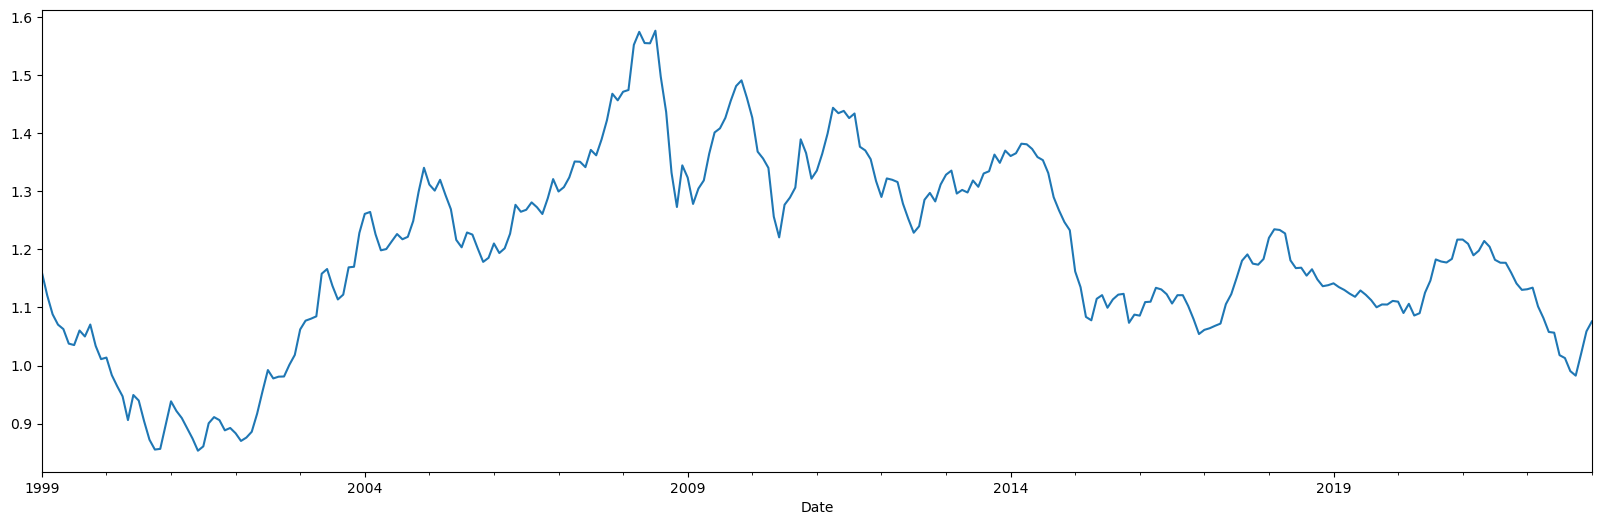

In [ ]:
plt.rcParams["figure.figsize"] = (20,6)
eru.plot()

In [ ]:
eru.head()

Date
1999-01-31    1.160780
1999-02-28    1.120765
1999-03-31    1.088296
1999-04-30    1.070441
1999-05-31    1.062810
Freq: M, Name: US[dollar], dtype: float64

In [ ]:
eru=pd.DataFrame(eru)
erutr=eru[:210]
erute=eru[210:]

In [ ]:
erutr

,US[dollar]
Date,
1999-01-31,1.160780
1999-02-28,1.120765
1999-03-31,1.088296
1999-04-30,1.070441
1999-05-31,1.062810
...,...
2016-02-29,1.109295
2016-03-31,1.109967
2016-04-30,1.133919


In [ ]:
erute.shape

(79, 1)

### **ARIMA Model-Remodel**

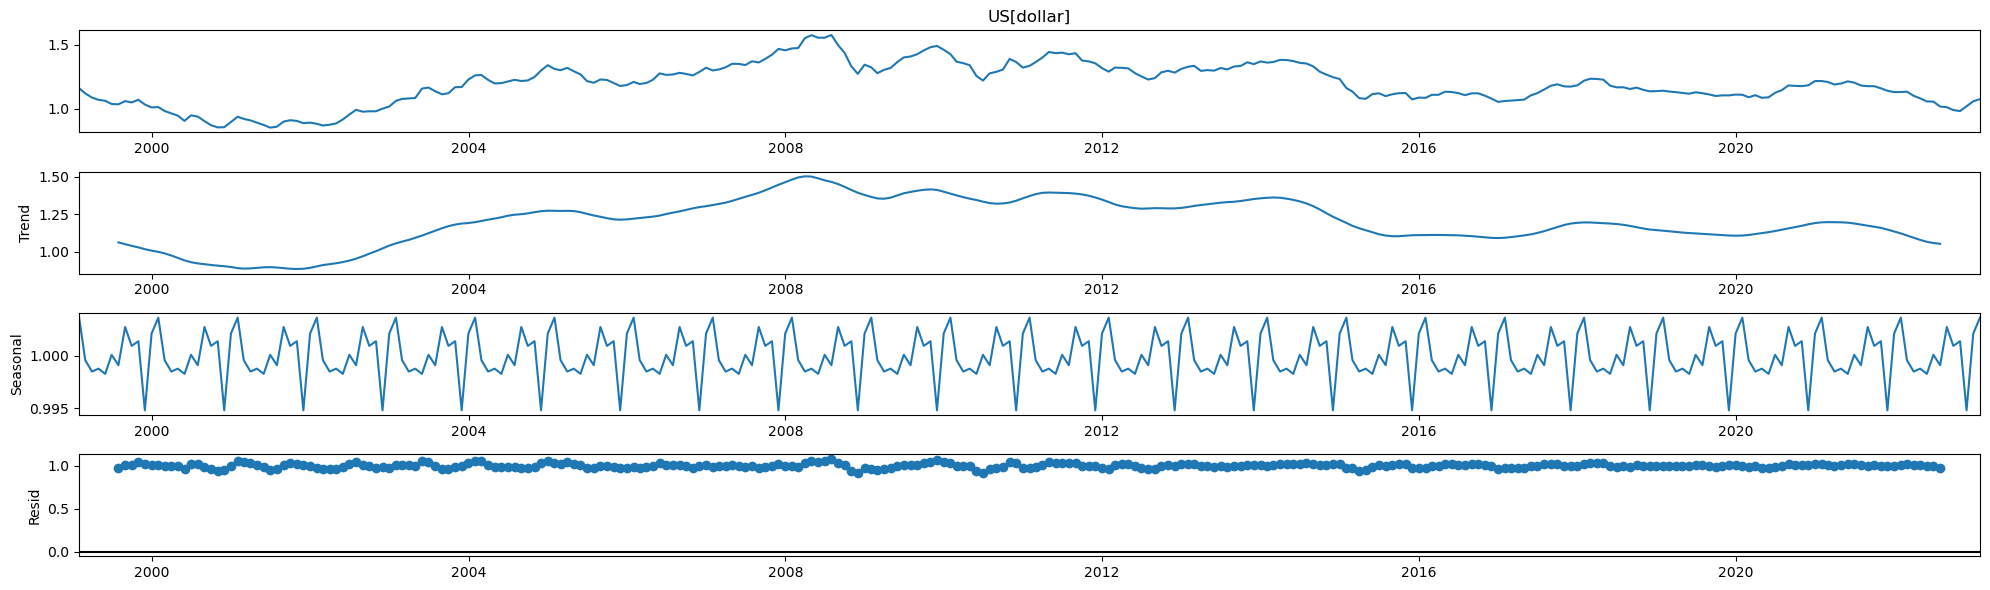

In [ ]:
# ETS Decomposition
result = seasonal_decompose(eru['US[dollar]'], model ='multiplicative')
# ETS plot 
result.plot()
plt.show()

**Components of a Time Series:**

   - **Trend**:The trend shows a general direction of the time series data over a long period of time. A trend can be increasing(upward), decreasing(downward), or horizontal(stationary).
   - **Seasonality**:The seasonality component exhibits a trend that repeats with respect to timing, direction, and magnitude. Some examples include an increase in water consumption in summer due to hot weather conditions, or an increase in the number of airline passengers during holidays each year.
   - **Cyclical Component**: These are the trends with no set repetition over a particular period of time. A cycle refers to the period of ups and downs, booms and slums of a time series, mostly observed in business cycles. These cycles do not exhibit a seasonal variation but generally occur over a time period of 3 to 12 years depending on the nature of the time series.
   - **Irregular Variation**: These are the fluctuations in the time series data which become evident when trend and cyclical variations are removed. These variations are unpredictable, erratic, and may or may not be random.
   - **ETS Decomposition**:ETS Decomposition is used to separate different components of a time series. The term ETS stands for Error, Trend, and Seasonality.

In [ ]:
erusf=auto_arima(eru['US[dollar]'], start_p = 1, start_q = 1,max_p = 3, max_q = 3, m = 12,start_P = 0, seasonal = True,d = None, D = 1, trace = True,error_action ='ignore',suppress_warnings = True,stepwise = True) 
erusf.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=3.10 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-395.908, Time=0.19 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-1079.806, Time=1.72 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-710.483, Time=1.59 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-397.897, Time=0.08 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=-993.971, Time=0.26 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=-1124.424, Time=5.40 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=6.39 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=2.27 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=-406.489, Time=1.76 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=-1152.714, Time=6.77 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=-1122.653, Time=2.28 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=-1183.122, Time=7.35 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=3.47 sec
 ARIMA(2,0,0)(2,1,2)[12] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  289
Model:             SARIMAX(2, 0, 0)x(2, 1, [1], 12)   Log Likelihood                 598.561
Date:                              Fri, 03 Feb 2023   AIC                          -1183.122
Time:                                      12:34:35   BIC                          -1157.754
Sample:                                  01-31-1999   HQIC                         -1172.943
                                       - 01-31-2023                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   9.052e-05      0.000      0.306      0.759      -0.000       0.001
ar.L1          1.3138      0.050     26.445      0.000       1.216       1.411
ar.L2         -0.3440      0.050     -6.871      0.000      -0.442      -0.246
ar.S.L12      -0.0163      0.076     -0.213      0.831      -0.166       0.133
ar.S.L24       0.0570      0.067      0.850      0.395      -0.074       0.188
ma.S.L12      -0.8747      0.081    -10.786      0.000      -1.034      -0.716
sigma2         0.0007   4.81e-05     13.739      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 5.32
Prob(Q):                              0.80   Prob(JB):                         0.07
Heteroskedasticity (H):               0.50   Skew:                             0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
erum=SARIMAX(eru['US[dollar]'], order = (2, 0, 0), seasonal_order =(2, 1, 1, 12))
result = erum.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                           US[dollar]   No. Observations:                  289
Model:             SARIMAX(2, 0, 0)x(2, 1, [1], 12)   Log Likelihood                 599.974
Date:                              Fri, 03 Feb 2023   AIC                          -1187.948
Time:                                      12:36:10   BIC                          -1166.204
Sample:                                  01-31-1999   HQIC                         -1179.224
                                       - 01-31-2023                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3027      0.051     25.392      0.000       1.202       1.403
ar.L2         -0.3285      0.051     -6.400      0.000      -0.429      -0.228
ar.S.L12      -0.0801      0.070     -1.149      0.250      -0.217       0.056
ar.S.L24       0.0688      0.063      1.096      0.273      -0.054       0.192
ma.S.L12      -0.9150      0.085    -10.801      0.000      -1.081      -0.749
sigma2         0.0007   5.24e-05     12.511      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                 6.43
Prob(Q):                              0.77   Prob(JB):                         0.04
Heteroskedasticity (H):               0.51   Skew:                             0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**ARIMA Model for Time Series Forecasting**
_ARIMA stands for autoregressive integrated moving average model and is specified by three order parameters: (p, d, q)._
  - AR(p) Autoregression – a regression model that utilizes the dependent relationship between a current observation and observations over a previous period.An auto regressive (AR(p)) component refers to the use of past values in the regression equation for the time series.
  - I(d) Integration – uses differencing of observations (subtracting an observation from observation at the previous time step) in order to make the time series stationary. Differencing involves the subtraction of the current values of a series with its previous values d number of times.
  - MA(q) Moving Average – a model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations. A moving average component depicts the error of the model as a combination of previous error terms. The order q represents the number of terms to be included in the model.

**Types of ARIMA Model**
- ARIMA:Non-seasonal Autoregressive Integrated Moving Averages
- SARIMA:Seasonal ARIMA
- SARIMAX:Seasonal ARIMA with exogenous variables

**Pyramid Auto-ARIMA**

- The ‘auto_arima’ function from the ‘pmdarima’ library helps us to identify the most optimal parameters for an ARIMA model and returns a fitted ARIMA model.

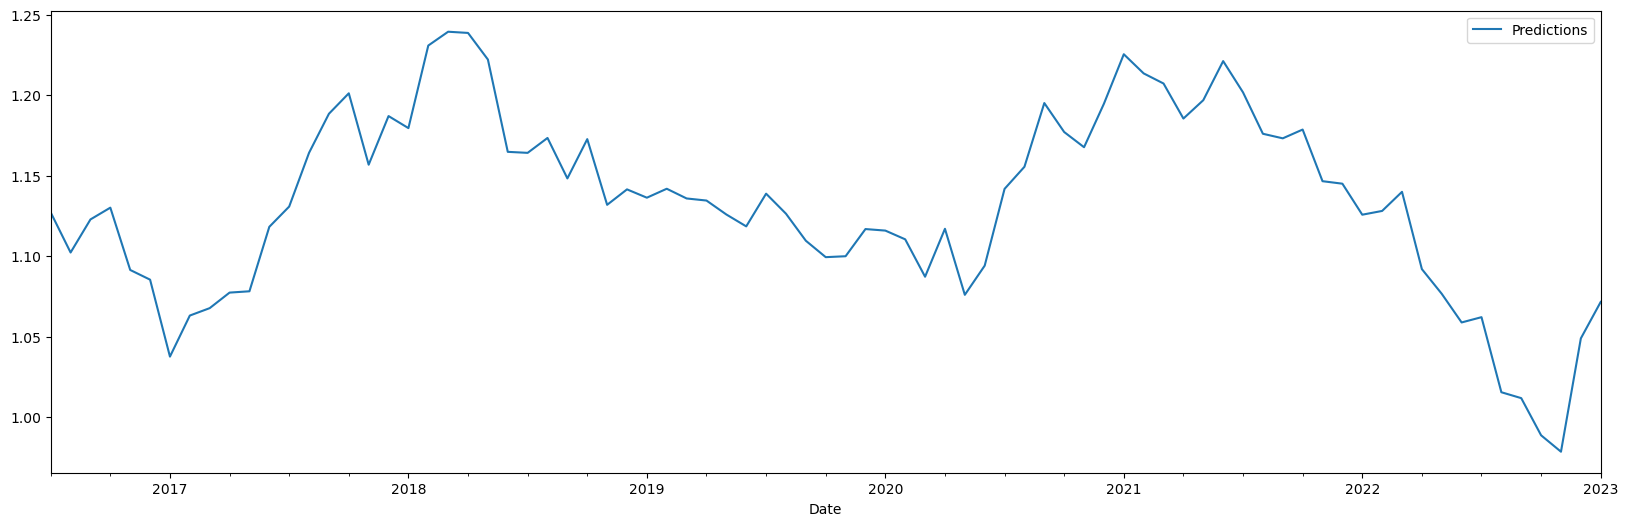

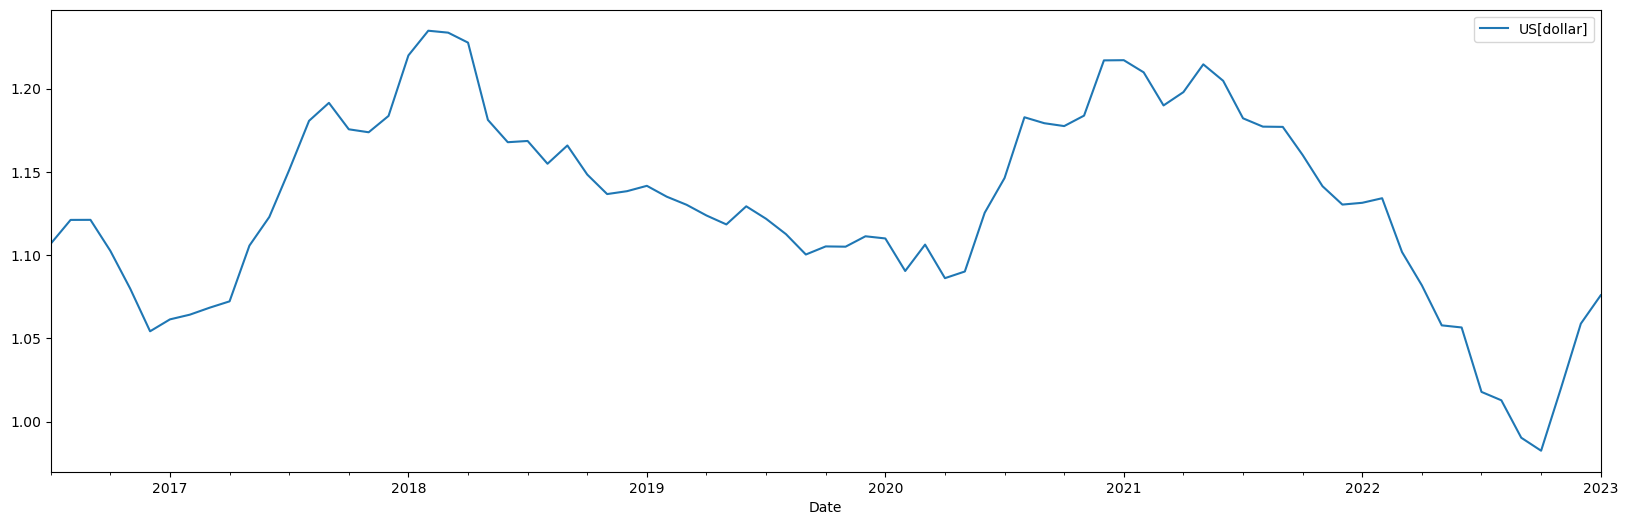

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
start= len(erutr)
end= len(erutr) + len(erute) - 1
# Predictions for one-year against the test set
predictions = result.predict(start, end,typ = 'levels').rename("Predictions")
# plot predictions and actual values
predictions.plot(legend = True)
erute.plot(legend = True)
plt.show()

In [ ]:
# Calculate root mean squared error
print('RMSE Score: ',rmse(erute, predictions))
# Calculate mean squared error
print('MSE Score: ',mean_squared_error(erute, predictions))

RMSE Score:  [0.05740566 0.06416234 0.05787309 0.05727121 0.06972912 0.07333631
 0.1097529  0.08898942 0.08551313 0.07861067 0.07805208 0.05871716
 0.05726249 0.06609408 0.0809826  0.09041801 0.06272871 0.07997414
 0.0749435  0.11493722 0.12245563 0.1217933  0.10748637 0.06639344
 0.06607639 0.07115235 0.05975744 0.07071945 0.05726521 0.05817714
 0.05748913 0.05824712 0.05744847 0.05735861 0.05750826 0.05865473
 0.05776512 0.05746479 0.06121247 0.06551529 0.06523955 0.05903806
 0.05927691 0.06090762 0.0722103  0.0589978  0.0795629  0.06823491
 0.05823239 0.06221289 0.08581851 0.07339809 0.06789173 0.08551321
 0.11028047 0.10029569 0.09520433 0.07890774 0.08715262 0.10666609
 0.09086051 0.07272636 0.07101045 0.07436719 0.05928799 0.05890401
 0.0575202  0.05734585 0.05792659 0.06942548 0.07912376 0.09231254
 0.08976202 0.12915302 0.13245182 0.153603   0.16311136 0.10026356
 0.08267634]
MSE Score:  0.00031145147488439496


<AxesSubplot:xlabel='Date'>

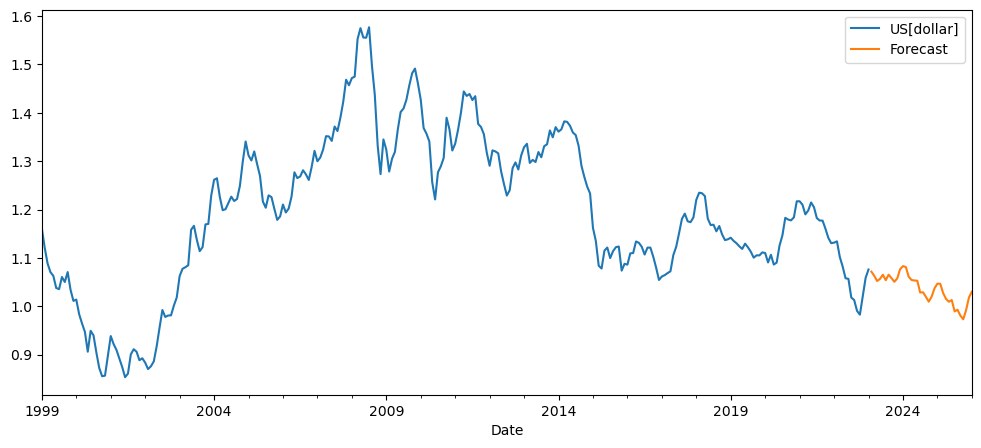

In [ ]:
# Train the model on the full dataset
erum=SARIMAX(eru['US[dollar]'],  order = (3, 0, 2), seasonal_order =(2, 1, 0, 12))
result =erum.fit() 
# Forecast for the next 3 years
forecast = result.predict(start = len(eru), end = (len(eru)-1) + 3 * 12, typ = 'levels').rename('Forecast') 
# Plot the forecast values
eru['US[dollar]'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)